### Project 2
Yunus Herman

In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression, LassoCV, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [660]:
# Data cleaning function 
def data_cleaning(df):
    # Rename column names into lowercase and no space
    df.columns = df.columns.str.lower().str.replace(' ','_')
    
    #delete pid columns
    df.drop(columns = ['pid'], inplace = True)
    
    # fix the values in ms_zoning
    df['ms_zoning'] = df['ms_zoning'].map({
    'RM': 'RM','I (all)':'I', 'RH':'RH','C (all)':'C' , 'A (agr)': 'A','FV':'FV','RL':'RL'})
    
    
    
    # fix the alley values
    df['alley'] = df['alley'].map({
    'Grvl': 2,'Pave':1, np.nan:0})
    
    df['lot_shape'] = df['lot_shape'].map({
    'Reg': 4,'IR1':3, 'IR2': 2,'IR3':1})
    
    df['land_contour'] = df['land_contour'].map({
    'Lvl': 4,'Bnk':3, 'HLS': 2,'Low':1})
    
    df['utilities'] = df['utilities'].map({
    'AllPub': 4,'NoSewr':3, 'NoSeWa': 2,'ELO':1})
    
    df['land_slope'] = df['land_slope'].map({
    'Gtl':3, 'Mod': 2,'Sev':1})
    
    df['bldg_type'] = df['bldg_type'].map({
    '1Fam': 5,'2fmCon':4,'Duplex':3,'TwnhsE':2,'Twnhs':1})
    
    df['exter_qual'] = df['exter_qual'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1})
    
    df['exter_cond'] = df['exter_cond'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1})
    
    df['bsmt_qual'] = df['bsmt_qual'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0})
    
    df['heating_qc'] = df['heating_qc'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1})
    
    df['central_air'] = df['central_air'].map({
    'N': 0 ,'Y':1})
    
    
    df['kitchen_qual'] = df['kitchen_qual'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1})
    
    df['fireplace_qu'] = df['fireplace_qu'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0})
    
    df['garage_qual'] = df['garage_qual'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0})
    
    df['garage_cond'] = df['garage_cond'].map({
    'Ex': 5 ,'Gd':4, 'TA':3,'Fa':2,'Po':1, np.nan: 0})
    
    df['paved_drive'] = df['paved_drive'].map({
    'Y': 3 ,'P':2, 'N':1})
    
    df['pool_qc'] = df['pool_qc'].map({
    'Ex': 4 ,'Gd':3, 'TA':2,'Fa':1, np.nan: 0})
    
    df['fence'] = df['fence'].map({
    'GdPrv': 4 ,'MnPrv':3, 'GdWo':2,'MnWw':1, np.nan: 0})
    
    df['garage_finish'] = df['garage_finish'].map({
    'Fin': 3 ,'RFn':2, 'Unf':1, np.nan: 0})
    
#make_substitutions = {
#'central_air': {'N': 0, 'Y':1},
#'paved_drive': {'N': 1, 'Y':3, 'P':2}
#}
#df = df.map(make_substitutions)

In [661]:
# Read csv files (Train and test)
df_train = pd.read_csv('./datasets/train.csv')
kaggle_test = pd.read_csv('./datasets/test.csv')

In [662]:
# Call datacleaning function for train and test data
data_cleaning(df_train)
data_cleaning(kaggle_test)

In [663]:
#delete rows if lot_frontage is null 
df_train.drop(df_train[df_train['bsmt_full_bath'].isnull()].index, inplace = True ) 
df_train.drop(df_train[df_train['bsmt_half_bath'].isnull()].index, inplace = True ) 
df_train.drop(df_train[df_train['garage_cars'].isnull()].index, inplace = True )
df_train.drop(df_train[df_train['lot_frontage'].isnull()].index, inplace = True )

In [664]:
features = ['heating_qc','central_air','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr',
           'kitchen_qual','fireplaces','garage_finish','garage_cars','paved_drive','wood_deck_sf','open_porch_sf','enclosed_porch',
           'screen_porch','saleprice']

''

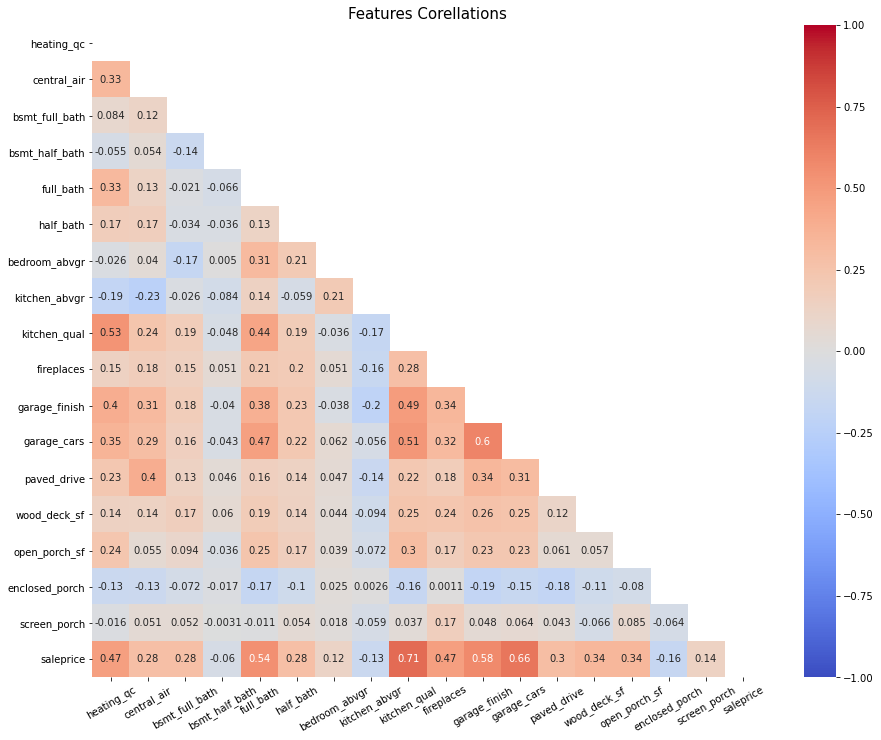

In [665]:
corr = df_train[features].corr()
# Establish size of figure.
# Get correlation of variables.
# Set up mask to be "True" in the upper triangle.
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True
# Plot our correlation heatmap, while masking the upper triangle to be white.
plt.figure(figsize=(15, 12))
sns.heatmap(corr, annot=True,
            cmap='coolwarm', vmin=-1, vmax=1, mask=mask)
plt.xticks(rotation = 30)
plt.title('Features Corellations', fontsize = 15)
;

In [666]:
# remove the sales price negative correlation features ('bsmt_full_bath','enclosed_porch') and 'saleprice'
#features = ['heating_qc','central_air','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr',
#           'kitchen_qual','fireplaces','garage_finish','paved_drive','wood_deck_sf','open_porch_sf',
#           'screen_porch','garage_cars','kitchen_abvgr']

In [667]:
features = ['heating_qc','central_air','bsmt_full_bath','bsmt_half_bath','full_bath','half_bath','bedroom_abvgr','kitchen_abvgr',
           'kitchen_qual','fireplaces','garage_finish','garage_cars','paved_drive','wood_deck_sf','open_porch_sf','enclosed_porch',
           'screen_porch']

In [668]:
#features = ['heating_qc','bsmt_full_bath','full_bath','half_bath','bedroom_abvgr',
#           'kitchen_qual','fireplaces','garage_finish','garage_cars','paved_drive','wood_deck_sf','open_porch_sf','enclosed_porch',
#           'screen_porch']

In [669]:
X = df_train[features]
y = df_train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.5, random_state=42)

In [670]:
lr = LinearRegression()

In [671]:
y_train_log = y_train.map(np.log)

In [672]:
lr.fit(X_train, y_train_log)

LinearRegression()

In [673]:
cdf1 = pd.DataFrame(lr.coef_, X.columns, columns = ['Coeff'])

In [674]:
cdf1

,Coeff
heating_qc,0.048920
central_air,0.127925
bsmt_full_bath,0.119249
bsmt_half_bath,0.000476
full_bath,0.150852
half_bath,0.045068
bedroom_abvgr,0.057601
kitchen_abvgr,-0.058810
kitchen_qual,0.173002
fireplaces,0.120061


In [675]:
pred = lr.predict(X_test)

In [676]:
residuals = y_test - pred

<AxesSubplot:>

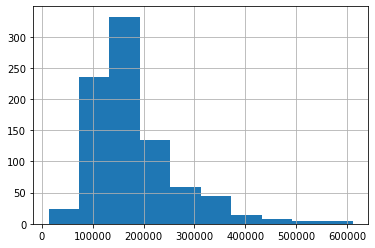

In [677]:
y_train.hist()

<AxesSubplot:>

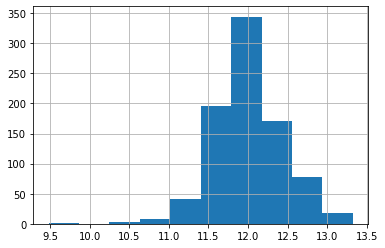

In [678]:
y_train_log.hist()

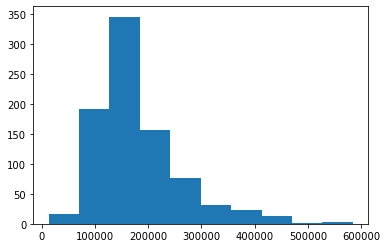

In [679]:
plt.hist(residuals);

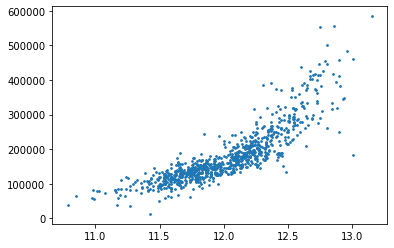

In [680]:
plt.scatter(pred, residuals, s=3)

In [681]:
pred_prices = np.exp(pred)   # np.exp return from log back to before log

In [682]:
r2_score(y_test, pred_prices) 

0.7995740253599942

In [683]:
#### kaggle test#######################

In [684]:

X_kaggle_test =kaggle_test[features]
kaggle_pred = lr.predict(X_kaggle_test)

In [685]:
kaggle_test['SalePrice'] = np.exp(kaggle_pred)
kaggle_test.rename(columns = {'id':'Id'}, inplace = True)

In [686]:
kaggle_test[['Id', 'SalePrice']].to_csv('yunus_test2.csv', index=False)

In [687]:
kaggle_test.shape

(878, 80)

In [688]:
############ try without log#######

In [689]:
X = df_train[features]
y = df_train['saleprice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.4, random_state=42)

In [690]:
lreg = LinearRegression()

In [691]:
lreg.fit(X_train, y_train)

LinearRegression()

In [692]:
pred1 = lreg.predict(X_test) 
residuals = y_test - pred1

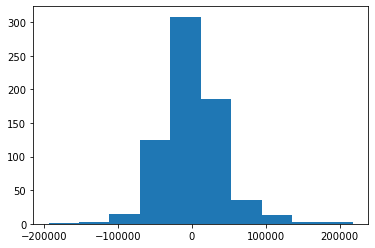

In [693]:
plt.hist(residuals);

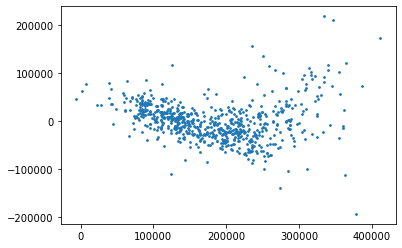

In [694]:
plt.scatter(pred1, residuals, s=3)

In [695]:
#cdf = pd.DataFrame(lreg.coef_, X.columns, columns = ['Coeff'])
cdf = pd.DataFrame(lreg.coef_,columns = ['Coeff'])
#cdf['Features'] = X.columns
cdf.insert(0, 'Features', X.columns)

In [697]:
cdf = cdf.sort_values(by='Coeff', ascending= False)

In [698]:
cdf

,Features,Coeff
8,kitchen_qual,40301.480049
4,full_bath,28050.690197
11,garage_cars,24264.629453
9,fireplaces,23568.699282
2,bsmt_full_bath,23486.416877
5,half_bath,10452.213200
6,bedroom_abvgr,8099.437015
0,heating_qc,5860.709588
10,garage_finish,3649.008759
12,paved_drive,1477.122126


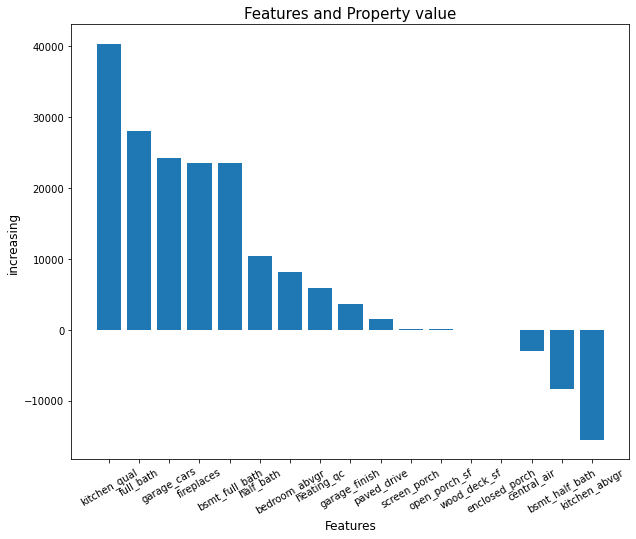

In [699]:
plt.figure(figsize = (10,8))
plt.title('Features and Property value', fontsize = 15)
plt.xlabel('Features', fontsize = 12)
plt.ylabel('increasing', fontsize = 12)
plt.xticks(rotation = 30)
plt.bar(cdf['Features'], cdf['Coeff']);

In [552]:
r2_score(y_test, pred1) 

0.7459860417040787

In [553]:
#### kaggle test#######################
kaggle_pred = lreg.predict(X_kaggle_test)

kaggle_test['SalePrice'] = kaggle_pred
kaggle_test.rename(columns = {'id':'Id'}, inplace = True)

kaggle_test[['Id', 'SalePrice']].to_csv('yunus_test3.csv', index=False)

kaggle_test.shape

(878, 80)